### Librerias

In [8]:
import sys
import pandas as pd

sys.path.append('../utils')
from figures import (
    convert_columns_names,
    process_product_column,
    plot_bar_percentage,
    plot_weekly_distribution,
    plot_weekday_distribution,
    plot_pie_chart,
    plot_stacked_barh,
    plot_joint_distribution,
    plot_linear_weekday_distribution
)

from utils import change_values

import warnings 
warnings.filterwarnings('ignore')

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### Empresas

In [4]:
df = pd.read_excel('../../results/no_fraude_abril_v28-5-24.xlsx')
df = convert_columns_names(df)
df = process_product_column(df)
df = change_values(df, "medio_de_radicacion", 0, "Otros")
df = change_values(df, "medio_de_radicacion", 0, "Otros")
df = change_values(df, "medio_de_respuesta", 0, "Otros")

In [21]:
df['producto_'].value_counts()

producto_
TARJETA DE CREDITO                     2791
CUENTA DE AHORROS DAMAS                2056
CREDITO                                 831
CUENTA DE AHORROS FIJO DIARIO           651
CREDIEXPRESS FIJO                       530
LEASING HABITACIONAL                    274
LEASING                                 226
CUENTA CORRIENTE                        108
CREDITO DE VEHICULO                      72
CERTIFICADOS                             40
LINEAS DE CREDITO PLUS                   35
Otros                                    20
TARJETA MÓVIL PEPE GANGA                 14
TARJETA MOVIL LIFEMILES                  14
CREDITO ADELANTO DE NOMINA               12
CREDIEXPRESS ROTATIVO BASICO URBANO       8
REDESCUENTO                               6
DAVIVIENDA LEASING                        5
TARJETA VIRTUAL DAVIVIENDA                5
Name: count, dtype: int64

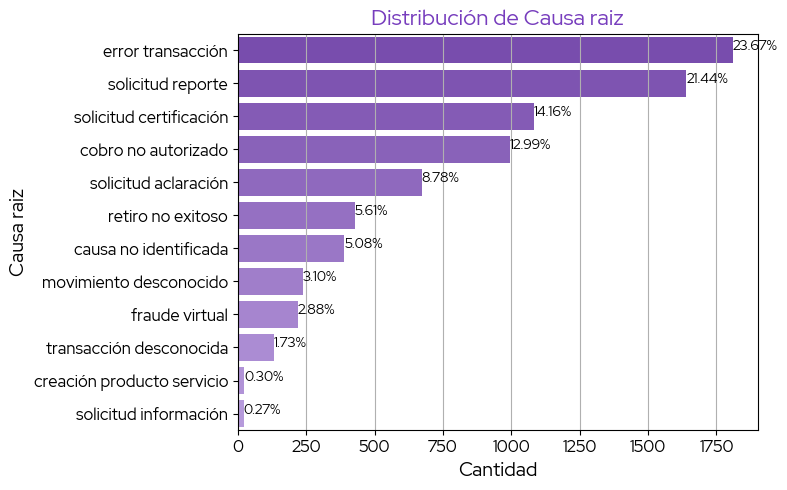

In [4]:
plot_bar_percentage(df, 'causa_raiz', 99.5)

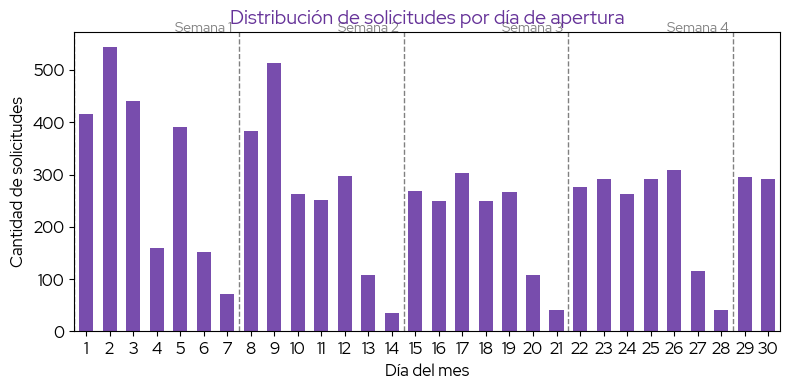

In [5]:
plot_weekly_distribution(df, 'fecha_apertura')

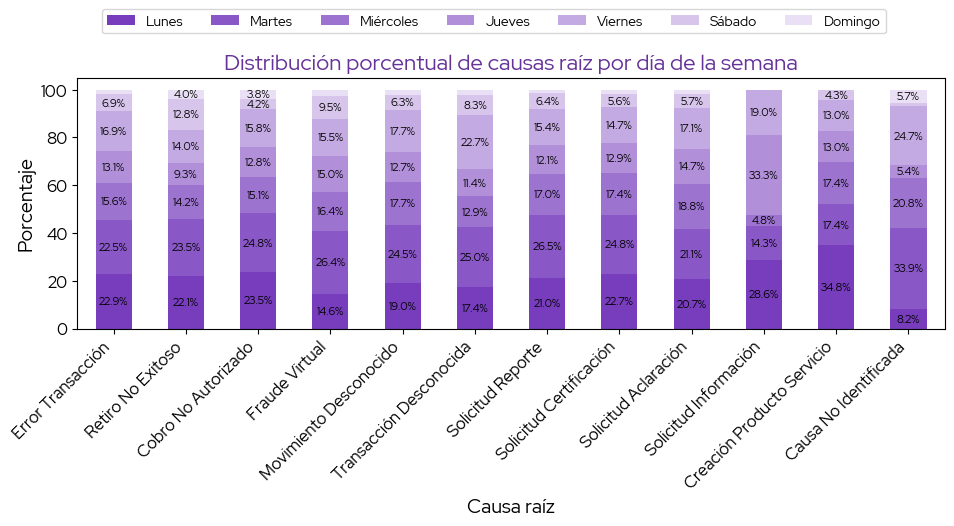

In [6]:
index_order = [
'Error Transacción','Retiro No Exitoso','Cobro No Autorizado','Fraude Virtual',
'Movimiento Desconocido','Transacción Desconocida', 'Solicitud Reporte',
 'Solicitud Certificación','Solicitud Aclaración', 'Solicitud Información',
'Creación Producto Servicio', 'Causa No Identificada'
]
plot_weekday_distribution(df, 'fecha_apertura', 'causa_raiz', order=index_order)

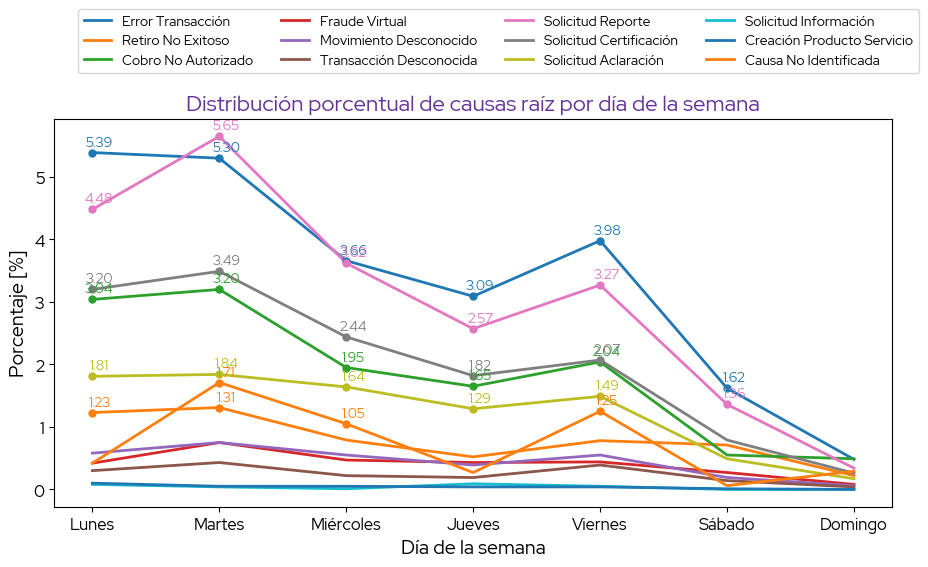

In [9]:
index_order = [
'Error Transacción','Retiro No Exitoso','Cobro No Autorizado','Fraude Virtual',
'Movimiento Desconocido','Transacción Desconocida', 'Solicitud Reporte',
 'Solicitud Certificación','Solicitud Aclaración', 'Solicitud Información',
'Creación Producto Servicio', 'Causa No Identificada'
]
plot_linear_weekday_distribution(df, 'fecha_apertura', 'causa_raiz', order=index_order, threshold=1)

In [10]:
df.causa_raiz.value_counts()

causa_raiz
Error Transacción              1811
Solicitud Reporte              1640
Solicitud Certificación        1083
Cobro No Autorizado             994
Solicitud Aclaración            672
Retiro No Exitoso               429
Causa No Identificada           389
Movimiento Desconocido          237
Fraude Virtual                  220
Transacción Desconocida         132
Creación Producto Servicio       23
Solicitud Información            21
Solicitud Ajuste                 19
Transacciones Primera Línea      12
Aclaración                        4
Solicitud Documentación           4
Solicitud Paz Salvo               2
Reversion Compra Tc               1
Reintegro Solicitado              1
Ajuste Compra Reversión           1
Ajuste Solicitud                  1
Ajuste Compra Rechazada           1
Reversión Compra                  1
Name: count, dtype: int64

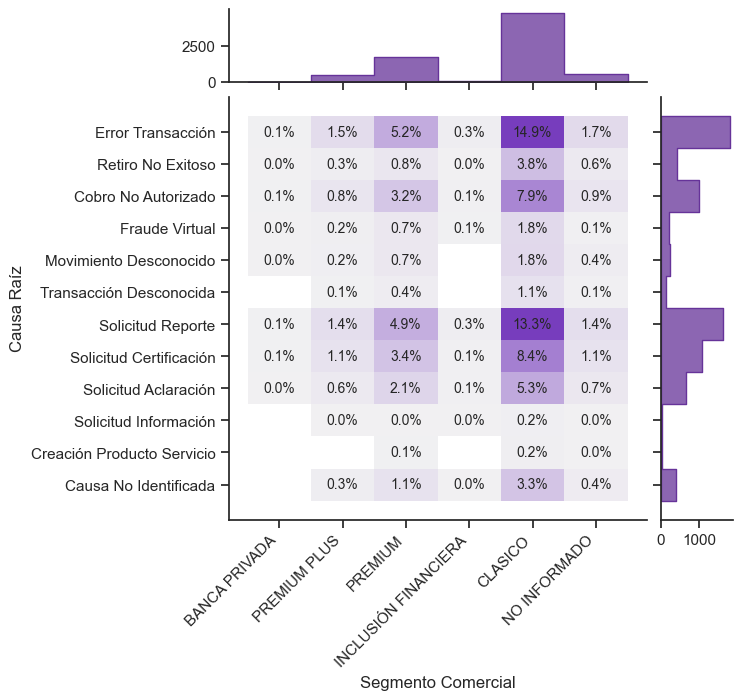

In [5]:
order = [
    'BANCA PRIVADA', 'PREMIUM PLUS', 'PREMIUM', 
    'INCLUSIÓN FINANCIERA','CLASICO','NO INFORMADO'
    ]

index_order = [
'Error Transacción','Retiro No Exitoso','Cobro No Autorizado','Fraude Virtual',
'Movimiento Desconocido','Transacción Desconocida', 'Solicitud Reporte',
 'Solicitud Certificación','Solicitud Aclaración', 'Solicitud Información',
'Creación Producto Servicio', 'Causa No Identificada'
]

plot_joint_distribution(
    df,
    x="segmento_comercial",
    y="causa_raiz",
    x_order=order,
    y_order=index_order,
    label_rotation=45,
    y_label="Causa Raíz",
    x_label="Segmento Comercial",
)

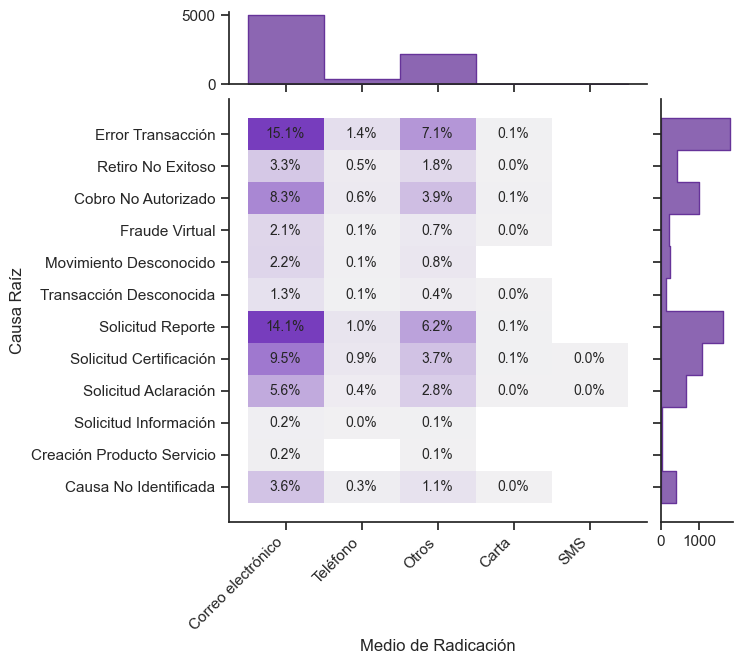

In [6]:
index_order = [
'Error Transacción','Retiro No Exitoso','Cobro No Autorizado','Fraude Virtual',
'Movimiento Desconocido','Transacción Desconocida', 'Solicitud Reporte',
 'Solicitud Certificación','Solicitud Aclaración', 'Solicitud Información',
'Creación Producto Servicio', 'Causa No Identificada'
]

plot_joint_distribution(
    df,
    x="medio_de_radicacion",
    y="causa_raiz",
    x_order=None,
    y_order=index_order,
    label_rotation=45,
    y_label="Causa Raíz",
    x_label="Medio de Radicación",
)

In [15]:
df.motivo.value_counts().index.tolist()

['Inconformidad en el saldo',
 'Inconsistencia TX otras redes',
 'Inconformidad en débito',
 'Certificaciones/paz y salvos',
 'Inconsistencia en compras',
 'Datos de la transacción',
 'Descuento y no pago',
 'Descuento no pago atm propio',
 'Inconformidad venta',
 'Reporte o calificación',
 'Liquidación de intereses',
 'Funcionamiento del canal',
 'Atención del funcionario',
 'Tarifas de servicio/comisiones',
 'Inconformidad gestión cobranza',
 'Extracto no generado-recibido',
 'Inconformidad sobre el premio',
 'Pagos mal aplicados',
 'Estados de cuenta',
 'Aclaración de movimiento',
 'Embargos',
 'Acumulación davipuntos-millas',
 'Tarjeta de Crédito',
 'Procesos Judiciales',
 'Notificaciones erradas',
 'Tarjeta de crédito emp',
 'Info errada producto-servicio',
 'Inconsistencia pago servicios',
 'Protección de datos',
 'Endoso póliza o cambio cia',
 'Solicitud voucher',
 'Reclam. Corresponsal',
 'Embargo',
 'Indemnización seguro',
 'Novedades de cartera',
 'Felicitación a funcionario'

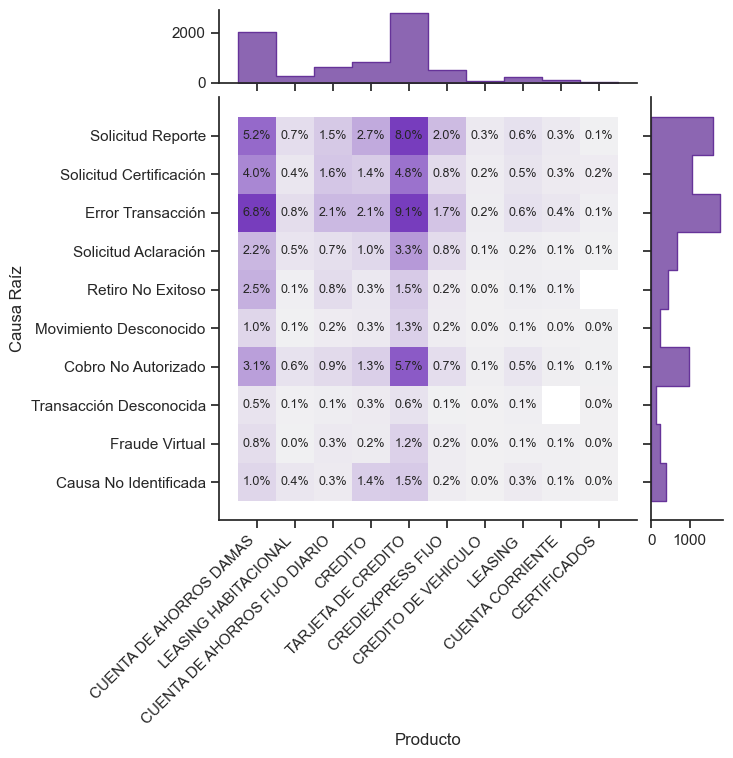

In [29]:
index_order = [
'Error Transacción','Retiro No Exitoso','Cobro No Autorizado','Fraude Virtual',
'Movimiento Desconocido','Transacción Desconocida', 'Solicitud Reporte',
 'Solicitud Certificación','Solicitud Aclaración', 'Solicitud Información',
'Creación Producto Servicio', 'Causa No Identificada'
]

col_order = [
    "CREDITO ADELANTO DE NOMINA","CREDITO","CREDITO DE VEHICULO","CREDIEXPRESS FIJO","LEASING","LEASING HABITACIONAL","CREDIEXPRESS ROTATIVO BASICO URBANO","CREDIEXPRESS FIJO","TARJETA DE CREDITO","CUENTA CORRIENTE","CUENTA DE AHORROS DAMAS","CUENTA DE AHORROS FIJO DIARIO","TARJETA MOVIL LIFEMILES","TARJETA VIRTUAL DAVIVIENDA","TARJETA MÓVIL PEPE GANGA","CERTIFICADOS","REDESCUENTO","LINEAS DE CREDITO PLUS","Otros"
]


plot_joint_distribution(
    df,
    x="producto_",
    y="causa_raiz",
    x_order=None,
    y_order=None,
    label_rotation=45,
    y_label="Causa Raíz",
    x_label="Producto",
    top_y=10,
    top_x=10,
    fontsize=9,
)

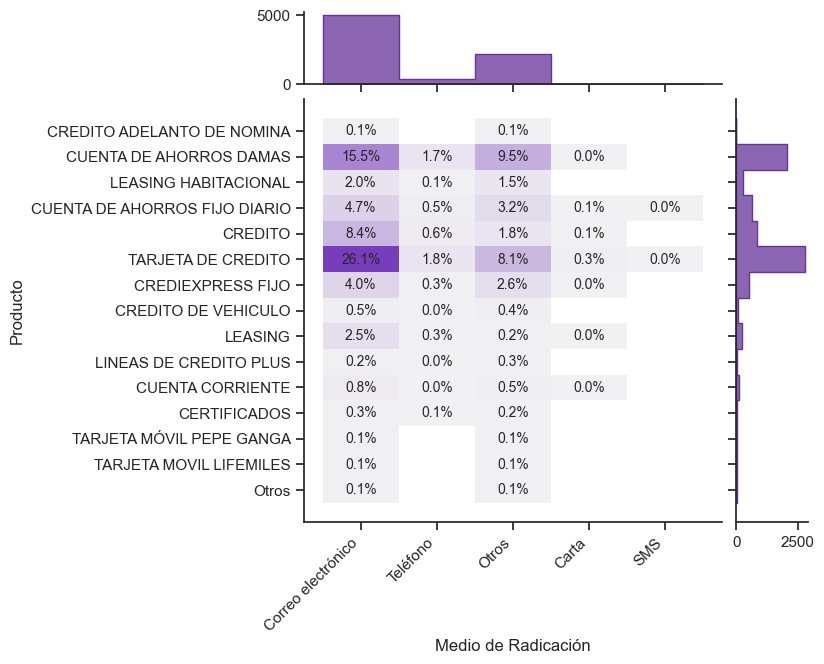

In [32]:
col_order = [
    "CREDITO ADELANTO DE NOMINA","CREDITO","CREDITO DE VEHICULO","CREDIEXPRESS FIJO","LEASING","LEASING HABITACIONAL","CREDIEXPRESS ROTATIVO BASICO URBANO","CREDIEXPRESS FIJO","TARJETA DE CREDITO","CUENTA CORRIENTE","CUENTA DE AHORROS DAMAS","CUENTA DE AHORROS FIJO DIARIO","TARJETA MOVIL LIFEMILES","TARJETA VIRTUAL DAVIVIENDA","TARJETA MÓVIL PEPE GANGA","CERTIFICADOS","REDESCUENTO","LINEAS DE CREDITO PLUS","Otros"
]
plot_joint_distribution(
    df,
    x="medio_de_radicacion",
    y="producto_",
    x_order=None,
    y_order=None,
    label_rotation=45,
    y_label="Producto",
    x_label="Medio de Radicación",
    top_y=15,
)

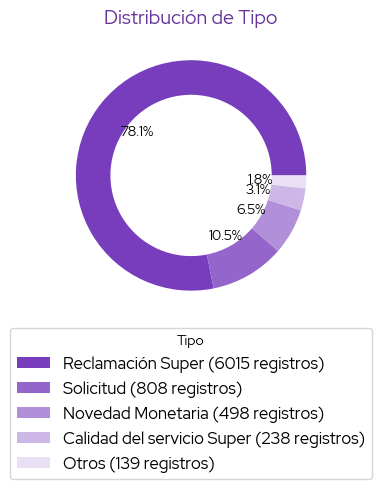

In [11]:
plot_pie_chart(df, 'tipo', 3, n_colors=5, 
               legend_ncol=1,num_registros=True)

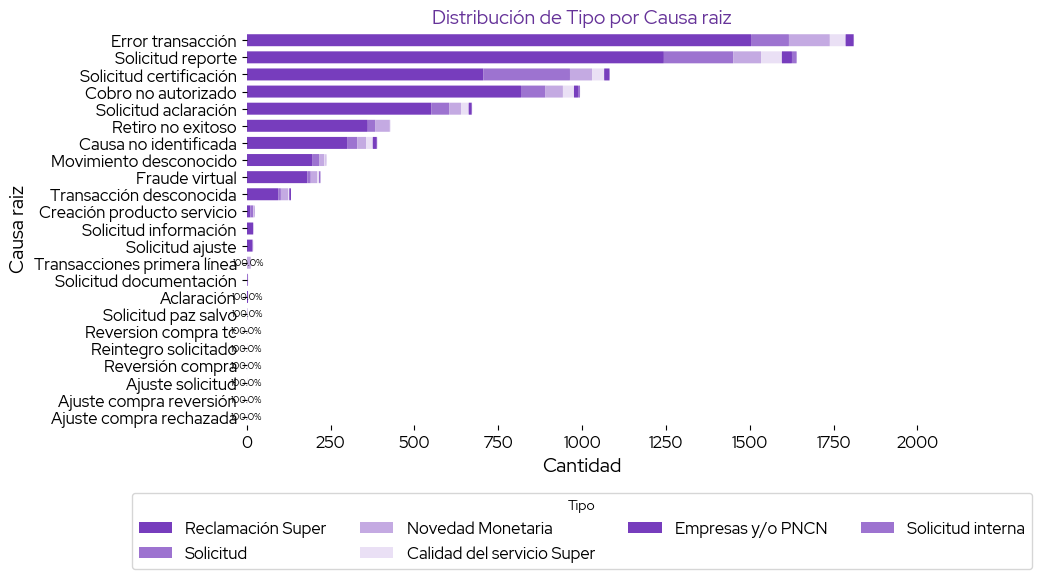

In [12]:
plot_stacked_barh(df,  'tipo','causa_raiz', xlim=(0,2000), 
                  remove_axes_lines=True, rounded_bars=True, 
                  n_colors=4, threshold=98)

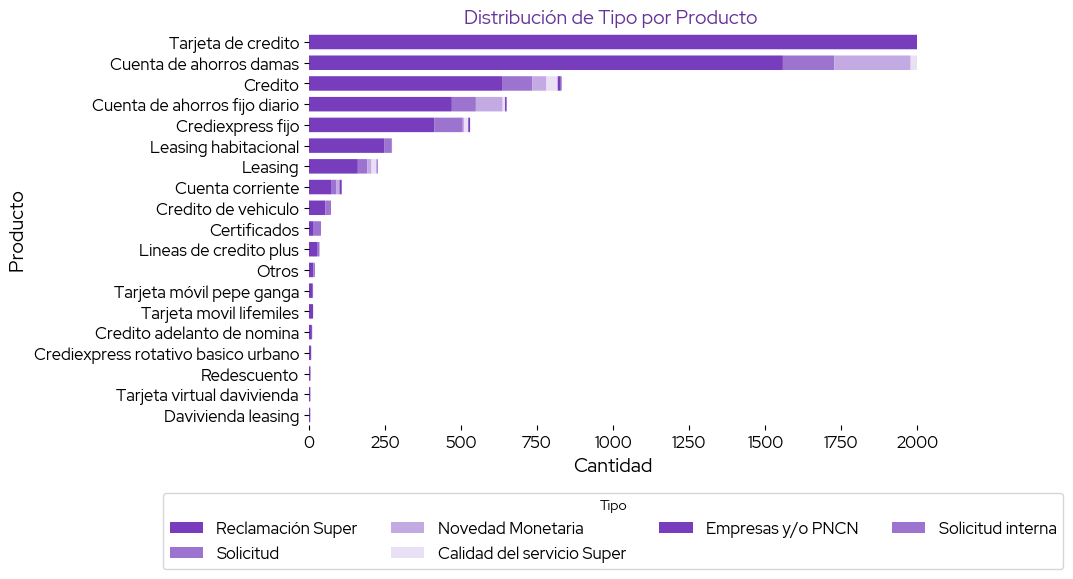

In [13]:
plot_stacked_barh(df,  'tipo','producto_', xlim=(0,2000), 
                  remove_axes_lines=True, rounded_bars=True, 
                  n_colors=4, threshold=101)

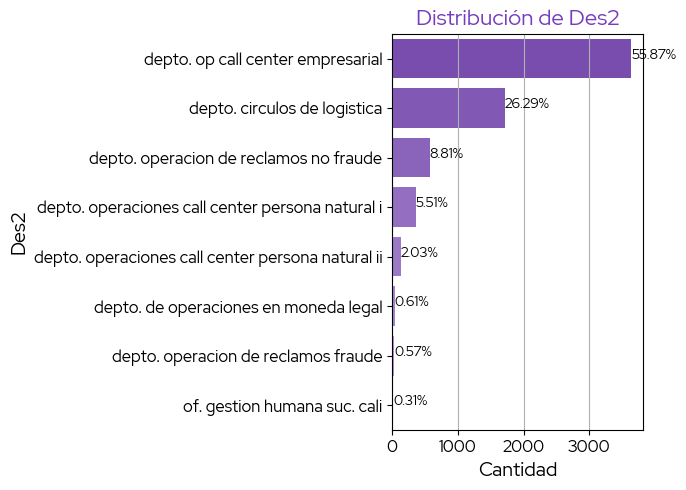

In [14]:
plot_bar_percentage(df, 'des2', percentage=85)


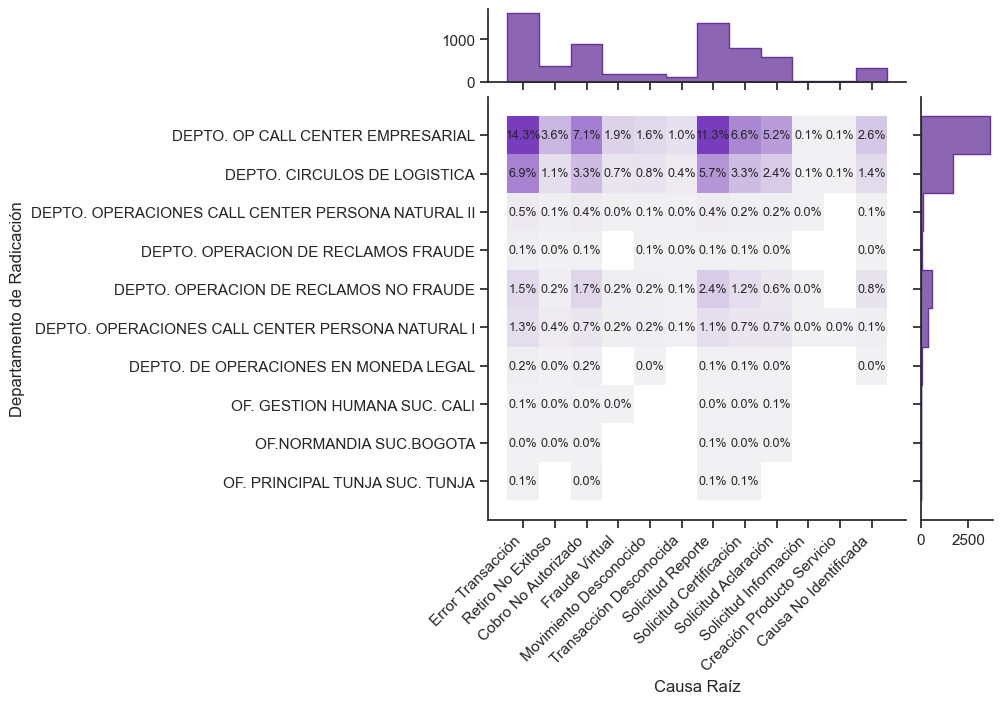

In [9]:
index_order = [
'Error Transacción','Retiro No Exitoso','Cobro No Autorizado','Fraude Virtual','Movimiento Desconocido','Transacción Desconocida', 'Solicitud Reporte', 'Solicitud Certificación','Solicitud Aclaración', 'Solicitud Información', 'Creación Producto Servicio', 'Causa No Identificada'
]
plot_joint_distribution(
    df,
    x="causa_raiz",
    y="des2",
    x_order=index_order,
    y_order=None,
    label_rotation=45,
    y_label="Departamento de Radicación",
    x_label="Causa Raíz",
    top_y=10,
    fontsize=9,
)

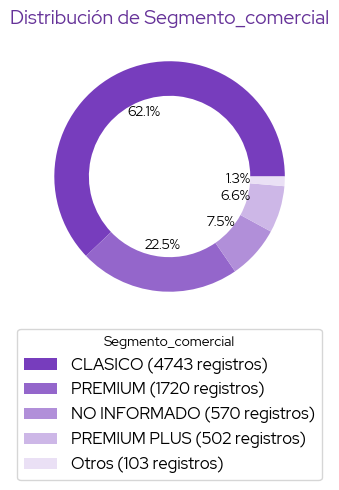

In [23]:
plot_pie_chart(df, 'segmento_comercial', 2, n_colors=5, legend_ncol=1, num_registros=True)


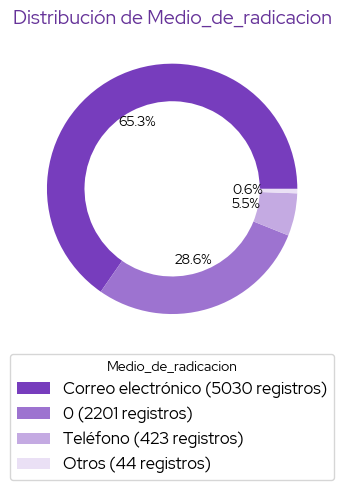

In [17]:
plot_pie_chart(df, 'medio_de_radicacion', 2, n_colors=4, legend_ncol=1, num_registros=True)


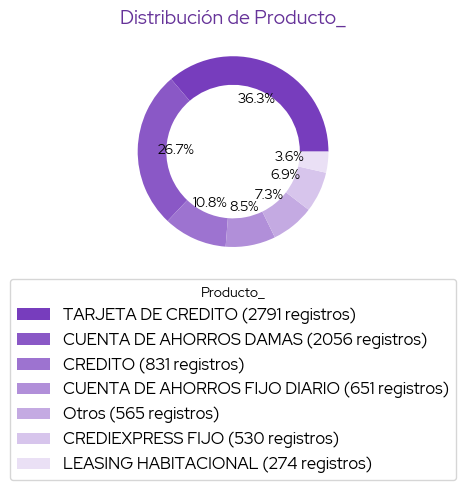

In [18]:
plot_pie_chart(df, 'producto_', 3, n_colors=7, legend_ncol=1, num_registros=True)


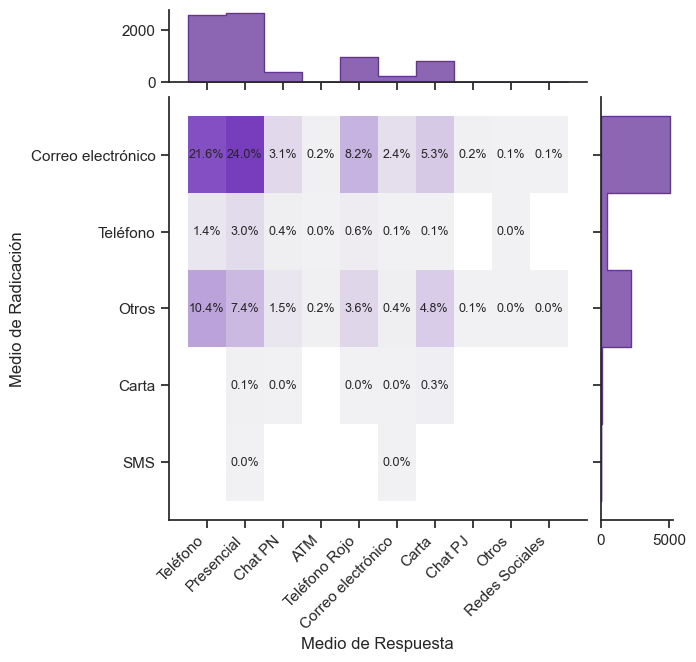

In [15]:
plot_joint_distribution(
    df,
    x="medio_de_respuesta",
    y="medio_de_radicacion",
    x_order=None,
    y_order=None,
    label_rotation=45,
    y_label="Medio de Radicación",
    x_label="Medio de Respuesta",
    top_x=10,
    fontsize=9,
)

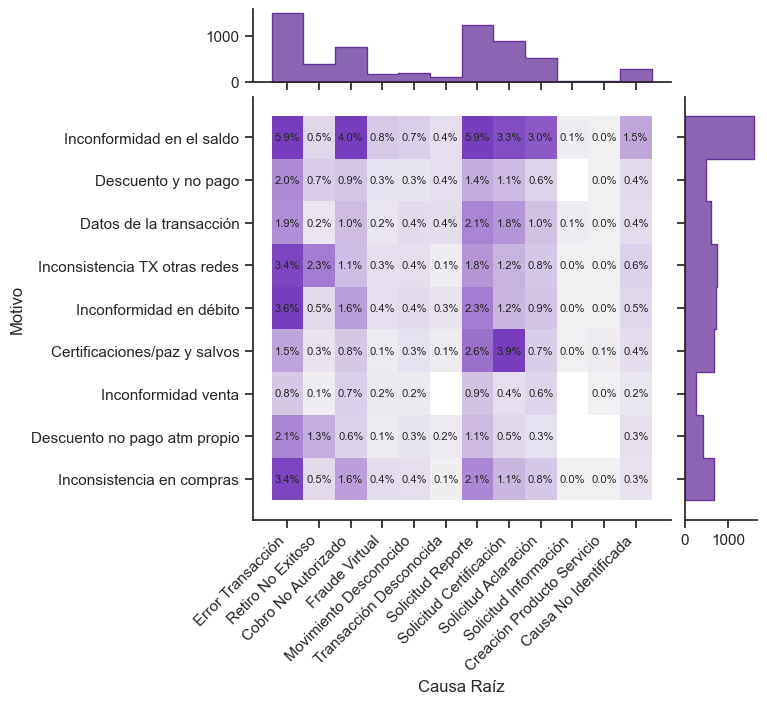

In [18]:
index_order = [
'Error Transacción','Retiro No Exitoso','Cobro No Autorizado','Fraude Virtual',
'Movimiento Desconocido','Transacción Desconocida', 'Solicitud Reporte',
 'Solicitud Certificación','Solicitud Aclaración', 'Solicitud Información',
'Creación Producto Servicio', 'Causa No Identificada'
]

plot_joint_distribution(
    df,
    x="causa_raiz",
    y="motivo",
    x_order=index_order,
    y_order=None,
    label_rotation=45,
    y_label="Motivo",
    x_label="Causa Raíz",
    top_y=9,
    fontsize=8,
)